# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", palette="muted", color_codes=True)

from stattools.cluster import ClusterKMeans
from stattools.datasets import load_old_faithful

## Example: Old Faithful Dataset

Our data consist of 272 pairs of eruption durations and waiting times until the next eruption (both measured in minutes) of the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.

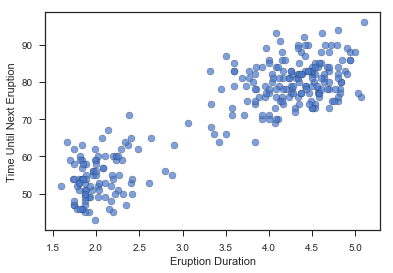

In [2]:
data = load_old_faithful()

plt.figure()
plt.scatter(data.Duration, data.Wait, c="b", edgecolor="k", alpha=0.7)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

Inspection of the scatterplot of the data shows two clear clusters.
These clusters can be identified by the $K$-means clustering algorithm, implemented in the `ClusterKMeans` class in the `stattools.cluster` module.
We fit the cluster model and plot the two clusters it generates, indicating their centers by red dots.

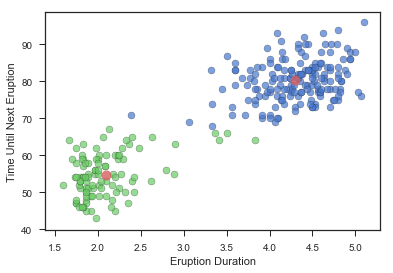

In [3]:
k = 2
ckm = ClusterKMeans(k=k)
ckm.fit(data, random_state=0)
clusters = ckm.predict(data)

plt.figure()
for i in range(k):
    x = data.Duration[clusters == i]
    y = data.Wait[clusters == i]
    p = plt.scatter(x, y, edgecolor="k", alpha=0.7)
    center = ckm.centers[i]
    plt.plot(center[0], center[1], c="r", marker="o", markersize=10, alpha=0.8)
plt.xlabel("Eruption Duration")
plt.ylabel("Time Until Next Eruption")
plt.show()
plt.close()

## Example: Artifical Gaussian clusters

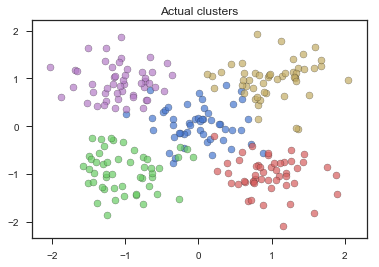

In [4]:
rs = np.random.RandomState(0)
size = 50
scale = 0.15

means = [(0, 0), (-1, -1), (1, -1), (-1, 1), (1, 1)]
xy = np.row_stack([rs.multivariate_normal(mean=mean, cov=(scale * np.eye(2)), size=50) for mean in means])
x = xy.take(0, axis=1)
y = xy.take(1, axis=1)

plt.figure()
for i in range(5):
    ind = slice(i * size, (i + 1) * size)
    x = xy[ind, 0]
    y = xy[ind, 1]
    plt.scatter(x, y, edgecolor="k", alpha=0.7)
plt.title("Actual clusters")
plt.show()
plt.close()

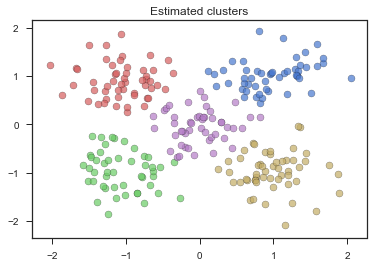

In [5]:
k = 5
ckm = ClusterKMeans(k=k)
ckm.fit(xy, repeats=10, random_state=rs)
clusters = ckm.predict(xy)

plt.figure()
for i in range(k):
    x = xy[clusters == i, 0]
    y = xy[clusters == i, 1]
    p = plt.scatter(x, y, edgecolor="k", alpha=0.7)
    center = ckm.centers[i]
plt.title("Estimated clusters")
plt.show()
plt.close()